# 数据挖掘实战入门
## 环境选择
### 编程环境
Python:
- Numpy：数据类型支持
- Pandas：数据处理
- Sklearn：机器学习算法库
- Matplotlib：图形化化展示
- Seaborn：对MatPlotlib进行进一步封装

### 数据集
平台：Kaggle


## workflow
1. Data visualization：通过数据可视化，对数据进行概览，激发的数据的感觉
2. Feature Processing：对特征属性进行加工
    1. 缺失值处理
        1. 缺失严重，丢弃该属性
        2. 缺失中等，将缺失值作为学习目标，重新生成补全
        3. 缺失中等，将缺失值作为一个新值
    2. 离散连续值转换处理（根据算法需要）
    3. 多值枚举值转二元枚举值
3. Algorithm Selection
    1. 算法类型选择
4. Optimization
    1. 欠拟合与过拟合分析
    2. 参数调整
    3. 考虑ensemble

In [162]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [51]:
#加载数据，并查看样例
# get titanic & test csv files as a DataFrame
train_df = pd.read_csv("../input/train.csv", dtype={"Age": np.float64}, )
test_df  = pd.read_csv("../input/test.csv", dtype={"Age": np.float64}, )
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# 查看数据类型及完整度
# over view for data type and missing value
train_df.info()
print '-----------------------------------'
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

In [53]:
#overview
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


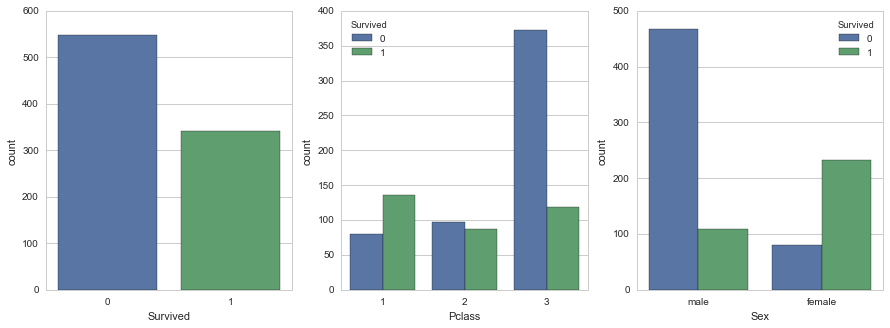

In [54]:
#图形化展示原始数据
#Data visualization: Original Data
#discrete values: Survived, Pclass, SibSp, Parch, Embarked, (Tickit,Cabin)
#continuous values: Age, Fare
fig, axises = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Survived',data=train_df,ax=axises[0])
sns.countplot(x='Pclass',hue='Survived',data=train_df,ax=axises[1])
sns.countplot(x='Sex',hue='Survived',data=train_df,ax=axises[2])

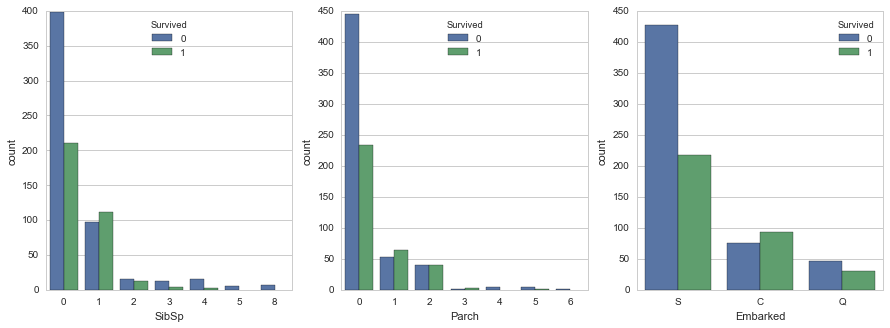

In [55]:
fig, axises = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='SibSp',hue='Survived',data=train_df,ax=axises[0])
sns.countplot(x='Parch',hue='Survived',data=train_df,ax=axises[1])
sns.countplot(x='Embarked',hue='Survived',data=train_df,ax=axises[2])

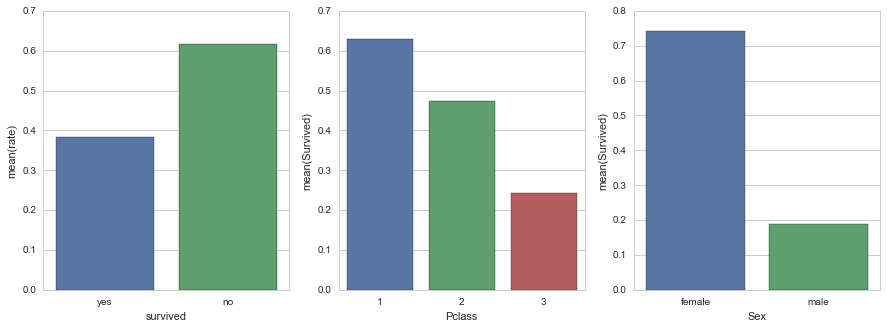

In [56]:
#展示数据与目标分类的概率关系
survived_rate=train_df['Survived'].mean()
tmp={'survived':['yes','no'],'rate':[survived_rate,1-survived_rate]}
survived_average=pd.DataFrame(tmp)
class_average=train_df[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sex_average=train_df[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()


fig, axises = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=survived_average,x='survived',y='rate',ax=axises[0])
sns.barplot(x='Pclass',y='Survived',data=class_average,ax=axises[1])
sns.barplot(x='Sex',y='Survived',data=sex_average,ax=axises[2])

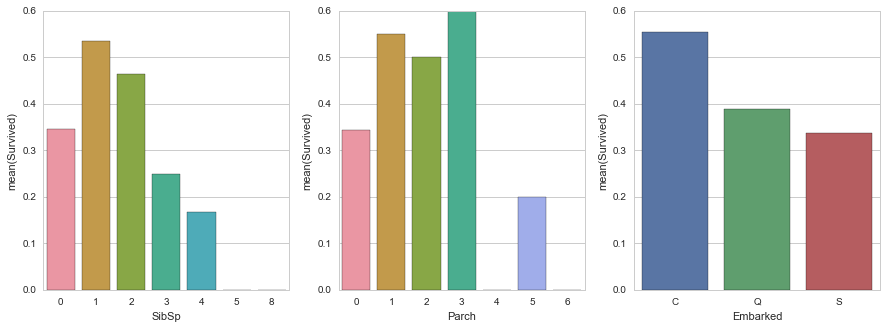

In [57]:
Sibsp_average=train_df[["SibSp", "Survived"]].groupby(['SibSp'],as_index=False).mean()
Parch_average=train_df[["Parch", "Survived"]].groupby(['Parch'],as_index=False).mean()
Embarked_average=train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()

fig, axises = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='SibSp',y='Survived',data=Sibsp_average,ax=axises[0])
sns.barplot(x='Parch',y='Survived',data=Parch_average,ax=axises[1])
sns.barplot(x='Embarked',y='Survived',data=Embarked_average,ax=axises[2])

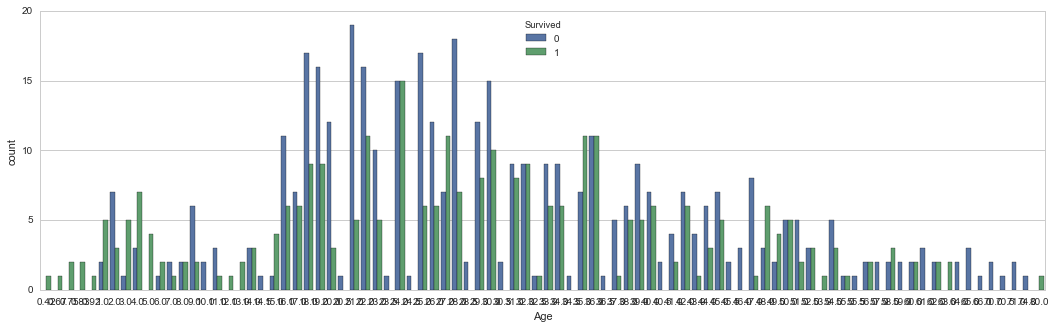

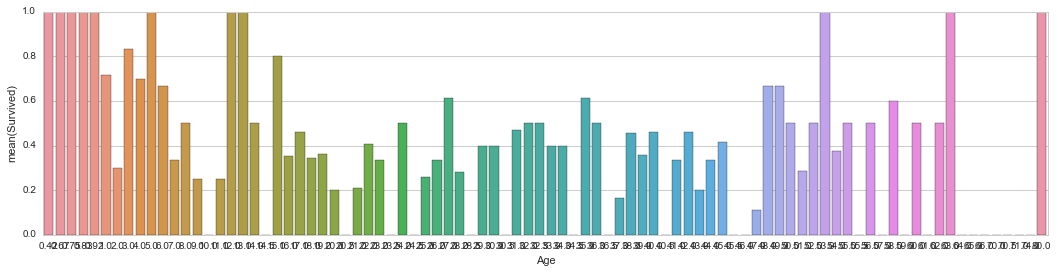

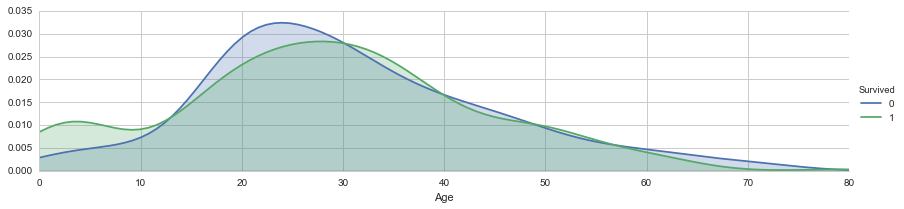

In [58]:
#view original data of Age
fig, axises = plt.subplots(figsize=(18,5))
sns.countplot(x='Age',hue='Survived',data=train_df)

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()


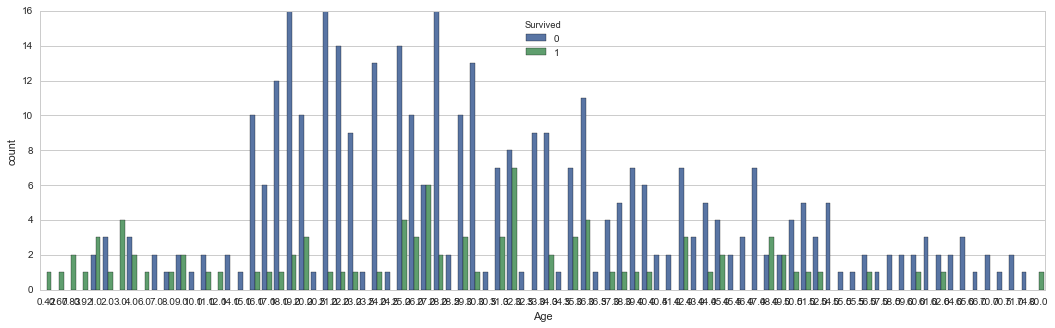

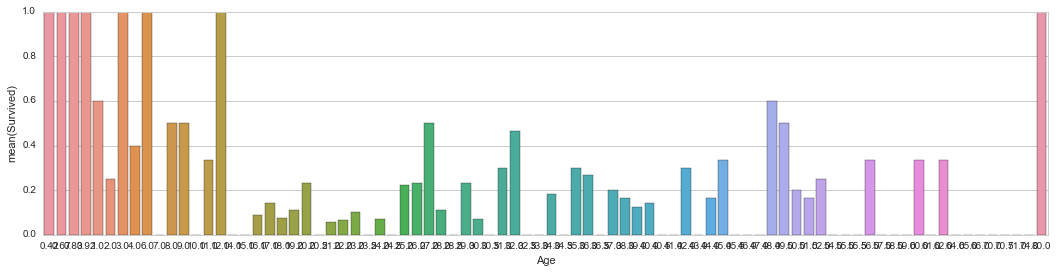

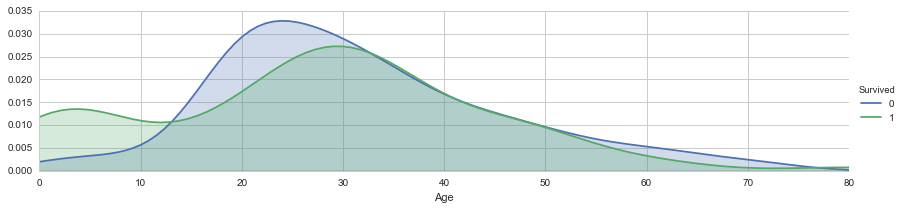

In [59]:
#查看男性的死亡率
male_train=train_df[train_df.Sex=='male']
fig, axises = plt.subplots(figsize=(18,5))
sns.countplot(x='Age',hue='Survived',data=male_train)

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = male_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(male_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, male_train['Age'].max()))
facet.add_legend()


In [91]:
#属性关联分析
sex_pclass=train_df[['Sex','Pclass','Survived']].groupby(['Sex','Pclass'],as_index=False).mean()
print sex_pclass

      Sex  Pclass  Survived
0  female       1  0.968085
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447


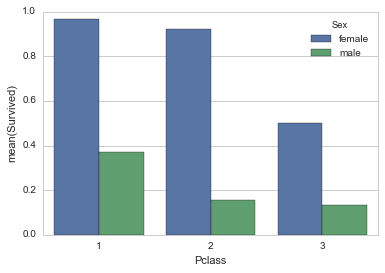

In [94]:
sns.barplot(x='Pclass',y='Survived',data=sex_pclass,hue='Sex')

In [92]:
#属性关联系数分析

In [93]:
#可考虑通过聚类，使部分属性成为离散类型

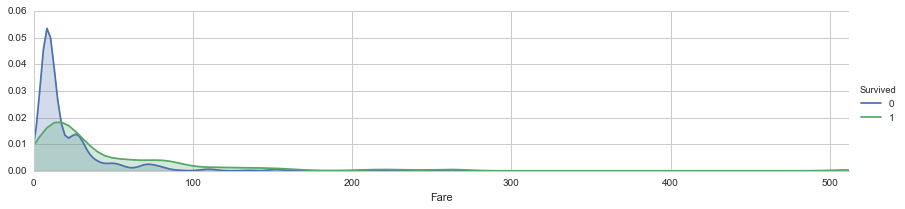

In [104]:
#船票价格Fare分析
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()


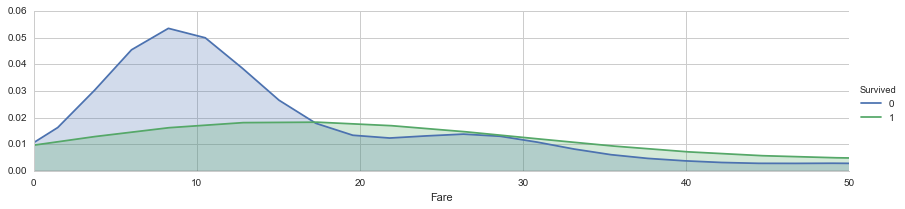

In [105]:
#to see more detail about Fare below 50, which is the majority
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 50))
facet.add_legend()

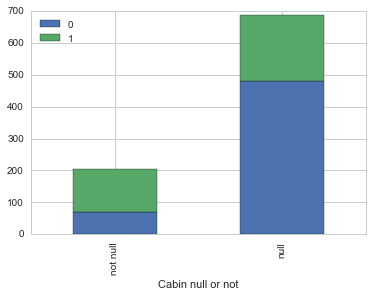

In [179]:
Survived_cabin=train_df.Survived[pd.notnull(train_df.Cabin)].value_counts()
Survived_nocabin=train_df.Survived[pd.isnull(train_df.Cabin)].value_counts()
df=pd.DataFrame({u'not null':Survived_cabin, u'null':Survived_nocabin })
df.transpose().plot(kind='bar',stacked=True)
plt.xlabel(u'Cabin null or not')

# deal with the missing values：缺失值处理
- too much missing value: discard
- some missing value: Label Value, make it NaN as a label
- some missing value: Continous Value, make it discremte, and mark NaN as a label
- littel missing value: try fill it 

In [116]:
#Embarked缺失值处理:补充两个最常用值
#train_X.info()
#print train_X.Embarked.value_counts()
train_X.loc[train_X.Embarked.isnull(),'Embarked']='S'

In [122]:
#增加Cabin是否知道属性
train_X.loc[train_X.Cabin.notnull(),'CabinKnown']=1
train_X.loc[train_X.Cabin.isnull(),'CabinKnown']=0

In [147]:
#增加Age是否知道属性
train_X.loc[train_X.Age.notnull(),'AgeKnown']=1
train_X.loc[train_X.Age.isnull(),'AgeKnown']=0

In [158]:
# 补充年龄值
# fill the missing age vaule with RandomForest
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    age_df=df[['Age','Fare','Parch','SibSp','Pclass','CabinKnown']]
    known_age=age_df[age_df.Age.notnull()]
    unknown_age=age_df[age_df.Age.isnull()]
    X=known_age.drop(['Age'],axis=1)
    y=known_age['Age']
    rfr=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(X,y)
    X_unknown=unknown_age.drop(['Age'],axis=1)
    y_unknown=rfr.predict(X_unknown)
    df.loc[df.Age.isnull(),'Age']=y_unknown
    return df,rfr
    

In [159]:
train_X, rfr=set_missing_ages(train_X)

In [166]:
dummies_Pclass=pd.get_dummies(train_X['Pclass'],prefix='Pclass')
dummies_Sex=pd.get_dummies(train_X['Sex'],prefix='Sex')
dummies_Embarked=pd.get_dummies(train_X['Embarked'],prefix='Embarked')

In [184]:
train_X=train_X.join([dummies_Pclass,dummies_Sex,dummies_Embarked])

In [186]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
CabinKnown     891 non-null float64
AgeKnown       891 non-null float64
Pclass_1       891 non-null float64
Pclass_2       891 non-null float64
Pclass_3       891 non-null float64
Sex_female     891 non-null float64
Sex_male       891 non-null float64
Embarked_C     891 non-null float64
Embarked_Q     891 non-null float64
Embarked_S     891 non-null float64
dtypes: float64(12), int64(5), object(5)
memory usage: 135.8+ KB


In [190]:
#删除重复或不需要的属性
train_X.drop(['PassengerId','Name','Ticket','Cabin','Sex','Pclass','Embarked'],axis=1,inplace=True)

In [197]:
#删除目标分类属性
train_X.drop('Survived',axis=1,inplace=True)

In [199]:
#获取目标分类
train_Y=train_df['Survived']

# Algorithm Selection 算法选择

## 逻辑回归

In [231]:
#训练集验证
from sklearn import cross_validation
logreg=LogisticRegression()
logreg.fit(train_X,train_Y)
print 'train score:',logreg.score(train_X,train_Y)


train score: 0.810325476992


### Cross Validation:交叉验证

In [271]:
logreg=LogisticRegression()
cross_train_X=train_X
cross_train_Y=train_Y
kfold = cross_validation.KFold(n=len(cross_train_X),n_folds=5)
train_scores=np.zeros(5)
cross_scores=np.zeros(5)
cross_index=0
for train, test in kfold:
    logreg.fit(cross_train_X.loc[train],cross_train_Y.loc[train])
    train_scores[cross_index]=logreg.score(cross_train_X.loc[train],cross_train_Y.loc[train])
    cross_scores[cross_index]=logreg.score(cross_train_X.loc[test],cross_train_Y.loc[test])
    print 'validation score', cross_scores[cross_index]
    cross_index=cross_index+1
print 'train statistic:'
print 'mean:',train_scores.mean()
print 'std:', train_scores.std()
print 'cross validation statistic:'
print 'mean:',cross_scores.mean()
print 'std:', cross_scores.std()

validation score 0.804469273743
validation score 0.792134831461
validation score 0.780898876404
validation score 0.775280898876
validation score 0.820224719101
train statistic:
mean: 0.812008131491
std: 0.00324666911626
cross validation statistic:
mean: 0.794601719917
std: 0.0162545642228


In [246]:
# 正则化对比
import sklearn.preprocessing as preprocessing
scaler= preprocessing.StandardScaler()
scaled_train_X=train_X.copy()
age_scale_param=scaler.fit(train_X['Age'])
scaled_train_X['Age_scaled']=scaler.fit_transform(scaled_train_X['Age'],age_scale_param)
fare_scale_param=scaler.fit(train_X['Fare'])
scaled_train_X['Fare_scaled']=scaler.fit_transform(scaled_train_X['Fare'],fare_scale_param)
scaled_train_X.drop(['Age','Fare'],axis=1,inplace=True)

D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [247]:
scaled_train_X.head()

,SibSp,Parch,CabinKnown,AgeKnown,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.557996,-0.502445
1,1,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.617176,0.786845
2,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.264203,-0.488854
3,1,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.396831,0.420730
4,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.396831,-0.486337


In [272]:
#交叉验证
logreg=LogisticRegression()
cross_train_X=scaled_train_X
cross_train_Y=train_Y
kfold = cross_validation.KFold(n=len(cross_train_X),n_folds=5)
train_scores=np.zeros(5)
cross_scores=np.zeros(5)
cross_index=0
for train, test in kfold:
    logreg.fit(cross_train_X.loc[train],cross_train_Y.loc[train])
    train_scores[cross_index]=logreg.score(cross_train_X.loc[train],cross_train_Y.loc[train])
    cross_scores[cross_index]=logreg.score(cross_train_X.loc[test],cross_train_Y.loc[test])
    print 'validation score', cross_scores[cross_index]
    cross_index=cross_index+1
print 'train statistic:'
print 'mean:',train_scores.mean()
print 'std:', train_scores.std()
print 'cross validation statistic:'
print 'mean:',cross_scores.mean()
print 'std:', cross_scores.std()

validation score 0.804469273743
validation score 0.792134831461
validation score 0.780898876404
validation score 0.775280898876
validation score 0.820224719101
train statistic:
mean: 0.812851616055
std: 0.00309471643734
cross validation statistic:
mean: 0.794601719917
std: 0.0162545642228


# Opetimizatin 优化

### 参数调优


In [396]:
from sklearn.grid_search import GridSearchCV
Cs=np.logspace(-6,3,10)
Ts=np.logspace(-6,-1,6)
lrg_gs=GridSearchCV(estimator=logreg, param_grid= dict(C=Cs,tol=Ts),n_jobs=-1)
lrg_gs.fit(train_X,train_Y)
print lrg_gs.best_score_

0.802469135802


In [397]:
print lrg_gs.best_estimator_.C
print lrg_gs.best_estimator_.tol

10.0
1e-06


In [298]:
logreg=LogisticRegression(C=10)
cross_train_X=train_X
cross_train_Y=train_Y
fold_num=5
kfold = cross_validation.KFold(n=len(cross_train_X),n_folds=fold_num)
train_scores=np.zeros(fold_num)
cross_scores=np.zeros(fold_num)
cross_index=0
for train, test in kfold:
    logreg.fit(cross_train_X.loc[train],cross_train_Y.loc[train])
    train_scores[cross_index]=logreg.score(cross_train_X.loc[train],cross_train_Y.loc[train])
    cross_scores[cross_index]=logreg.score(cross_train_X.loc[test],cross_train_Y.loc[test])
    print 'validation score', cross_scores[cross_index]
    cross_index=cross_index+1
print 'train statistic:'
print 'mean:',train_scores.mean()
print 'std:', train_scores.std()
print 'cross validation statistic:'
print 'mean:',cross_scores.mean()
print 'std:', cross_scores.std()

validation score 0.804469273743
validation score 0.792134831461
validation score 0.780898876404
validation score 0.769662921348
validation score 0.825842696629
train statistic:
mean: 0.815096049293
std: 0.00397532791093
cross validation statistic:
mean: 0.794601719917
std: 0.0194379236416


In [286]:
logreg=LogisticRegression(C=10)
logreg.fit(train_X,train_Y)
print 'train score:',logreg.score(train_X,train_Y)

train score: 0.809203142536


### Learning Curve: 学习曲线

In [337]:
from sklearn.learning_curve import learning_curve
logreg=LogisticRegression(C=10)
fold_num=5
kfold = cross_validation.KFold(n=len(cross_train_X),n_folds=fold_num)
estimator=logreg
train_sizes,train_scores,test_scores=learning_curve(estimator=estimator,cv=kfold,
                                                    X=train_X,y=train_Y ,n_jobs=-1)

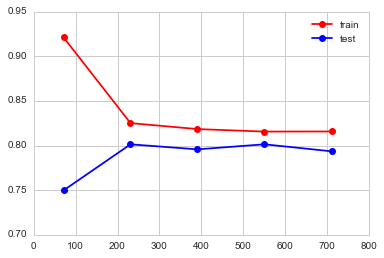

In [338]:
plt.plot(train_sizes,train_scores.mean(axis=1),'o-',color='r',label='train')
plt.plot(train_sizes,test_scores.mean(axis=1),'o-',color='b',label='test')
plt.legend(loc='best')

训练集与测试集的准确度相差不大，所以不存在过度拟合的情况

## Model ensemble 模型融合

In [368]:
from sklearn.ensemble import BaggingRegressor
clf=LogisticRegression(C=10,penalty='l2',tol=1e-3)
bagging_clf=BaggingRegressor(clf,n_estimators=20,max_samples=0.4,
                             max_features=0.6,bootstrap=True,bootstrap_features=True,
                            n_jobs=-1)
bagging_clf.fit(train_X,train_Y)
print bagging_clf.score(train_X,train_Y)

0.347319887834


模型融合的效果一般，有待进一步研究

# 生成测试结果

In [369]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [385]:
test_X=test_df.copy()

In [386]:
#填充Fare缺失数据
test_X.loc[test_X.Fare.isnull(),'Fare']=test_X[test_X.Pclass==3]['Fare'].mean()

In [387]:
#增加Cabin是否知道属性
test_X.loc[test_X.Cabin.notnull(),'CabinKnown']=1
test_X.loc[test_X.Cabin.isnull(),'CabinKnown']=0

In [388]:
#增加Age是否知道属性
test_X.loc[test_X.Age.notnull(),'AgeKnown']=1
test_X.loc[test_X.Age.isnull(),'AgeKnown']=0

In [389]:
#填充Age
test_age_df=test_X[['Age','Fare','Parch','SibSp','Pclass','CabinKnown']]
test_age_unkown=test_age_df[test_X.Age.isnull()]
test_age_unkown.drop('Age',axis=1,inplace=True)
test_age_pred=rfr.predict(test_age_unkown)
test_X.loc[test_X.Age.isnull(),'Age']=test_age_pred

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [391]:
#多值枚举值转化为二元枚举值
dummies_Pclass=pd.get_dummies(test_X['Pclass'],prefix='Pclass')
dummies_Sex=pd.get_dummies(test_X['Sex'],prefix='Sex')
dummies_Embarked=pd.get_dummies(test_X['Embarked'],prefix='Embarked')
test_X=test_X.join([dummies_Pclass,dummies_Sex,dummies_Embarked])

In [392]:
#删除重复或不需要的属性
test_X.drop(['PassengerId','Name','Ticket','Cabin','Sex','Pclass','Embarked'],axis=1,inplace=True)

In [408]:
logreg=LogisticRegression()
logreg.fit(train_X,train_Y)
print logreg
print logreg.score(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.810325476992


In [411]:
#生成问题结果
pred_Y=logreg.predict(test_X)
submissions= pd.DataFrame({
        'PassengerId':test_df["PassengerId"],
        'Survived':pred_Y
    })

In [414]:
submissions.to_csv('../output/logreg161008.csv',index=False)